In [1]:
# Import libraries
from pylab import *
from pandas import *
import numpy
from random import shuffle

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1]
 [1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
Maze size: (17, 17)


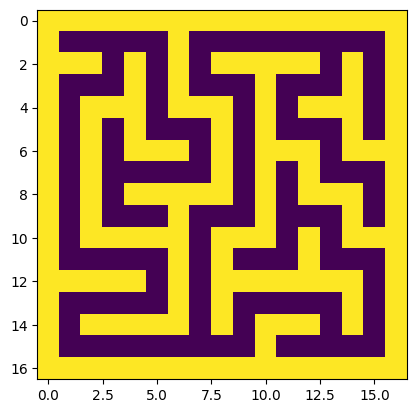

In [2]:
# Generate maze
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))

print(maze)
print('Maze size:', maze.shape)
imshow(maze)

In [3]:
# Set start and target locations
startLocation=[1,1]
targetLocation=[15,15]
if maze[startLocation[0]][startLocation[1]]==1:
    print('Start location is not valid =', maze[1][1])
else:
    print('Start location is valid =', maze[1][1])

if maze[targetLocation[0]][targetLocation[1]]==1:
    print('Target location is not valid =', maze[15][15])
else:
    print('Target location is valid =', maze[15][15])

Start location is valid = 0
Target location is valid = 0


In [4]:
# Use A* algorithm to solve above maze without classes